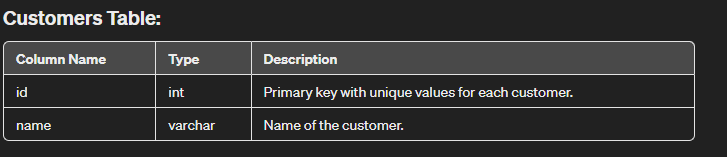
id is the primary key (column with unique values) for this table.
Each row of this table indicates the ID and name of a customer.
# Input
| id | name  |
|----|-------|
| 1  | Joe   |
| 2  | Henry |
| 3  | Sam   |
| 4  | Max   |


id is the primary key (column with unique values) for this table.
customerId is a foreign key (reference columns) of the ID from the Customers table.
Each row of this table indicates the ID of an order and the ID of the customer who ordered it.

| id | customerId |
|----|------------|
| 1  | 3          |
| 2  | 1          |


# Output
| Customers | Description                                             |
|-----------|---------------------------------------------------------|
| Henry     | Customers who never placed any orders.                  |
| Max       |                                                         |


# Intuition
- Perform Left Join on customers and orders.
- Filter customers who never ordered select only those rows where the 'customerId' column is NaN (indicating that the customer never placed an order).
- Create DataFrame for customers who never ordered(Optional).
- Rename column.

In [2]:
import pandas as pd

def find_customers(customers: pd.DataFrame, orders: pd.DataFrame) -> pd.DataFrame:
    # Select the customers whose 'id' is not present in the orders DataFrame's 'customerId' column.
    df = customers[~customers['id'].isin(orders['customerId'])]

    # Build a DataFrame that only contains the 'name' column and rename it as 'Customers'.
    df = df[['name']].rename(columns={'name': 'Customers'})

    return df


df = customers[~customers['id'].isin(orders['customerId'])]: In this line, we use boolean indexing to filter the rows from the 'customers' DataFrame. The condition ~customers['id'].isin(orders['customerId']) checks if the 'id' column in the 'customers' DataFrame is not present in the 'customerId' column of the 'orders' DataFrame. The tilde (~) operator negates the result, so we select only the rows where the 'id' is not found in the 'customerId' column of the 'orders' DataFrame.

df = df[['name']].rename(columns={'name': 'Customers'}): After filtering, we create a new DataFrame df containing only the 'name' column. The [['name']] part is used to select only the 'name' column and keep it as a DataFrame. Then, we rename this column from 'name' to 'Customers' using the rename function. The resulting DataFrame df contains the names of customers who never placed any orders, and the column is labeled as 'Customers'.

In summary, the find_customers function takes two DataFrames, 'customers' and 'orders', and filters the 'customers' DataFrame to find customers whose 'id' is not present in the 'orders' DataFrame's 'customerId' column. It then returns a new DataFrame with the names of these customers, labeled as 'Customers'. This function effectively finds customers who never placed any orders.

In [3]:
import pandas as pd

def find_customers(customers: pd.DataFrame, orders: pd.DataFrame) -> pd.DataFrame:
    # Merge the customers DataFrame with the orders DataFrame using a left join on 'id' and 'customerId'
    merged_df = customers.merge(orders, how='left', left_on='id', right_on='customerId')
    
    # Use the 'customerId' column to create a boolean mask for customers who never placed any orders
    mask = merged_df['customerId'].isna()
    
    # Filter the rows using the boolean mask
    result_df = merged_df[mask]
    
    # Select only the 'name' column from the result DataFrame and rename it as 'Customers'
    result_df = result_df[['name']].rename(columns={'name': 'Customers'})
    
    return result_df

Approach
- We first merge the 'customers' DataFrame with the 'orders' DataFrame using a left join. This allows us to have a DataFrame where each row represents a customer and includes any orders they may have placed.

- We create a boolean mask named mask by checking if the 'customerId' column in the merged DataFrame is null. This mask will be True for customers who never placed any orders and False for customers who placed orders.

- We use the boolean mask mask to filter the rows from the 'customers' DataFrame, selecting only those customers who never placed any orders.

- We select only the 'name' column from the filtered DataFrame and rename it as 'Customers'.

- Finally, we return the resulting DataFrame containing the names of customers who never placed any orders, labeled as 'Customers'.

- This approach achieves the same goal of finding customers who never placed any orders but uses a different technique involving a left join and boolean masking.